d:\python3.5.2\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
d:\python3.5.2\lib\site-packages\ipykernel_launcher.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


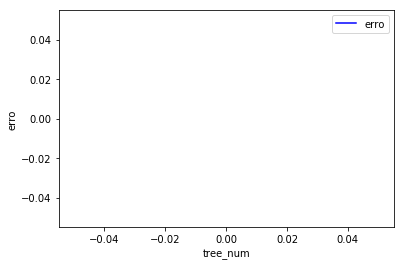

In [10]:
import os
import pylab
os.chdir("D://Documents//WeChat Files//flyingnvxia//FileStorage//File//2019-06")

import numpy
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing

dataset1 = pd.read_csv('data/dataset1.csv')
dataset1.label.replace(-1,0,inplace=True)
dataset2 = pd.read_csv('data/dataset2.csv')
dataset2.label.replace(-1,0,inplace=True)
dataset3 = pd.read_csv('data/dataset3.csv')

dataset1.drop_duplicates(inplace=True)
dataset2.drop_duplicates(inplace=True)
dataset3.drop_duplicates(inplace=True)

dataset12 = pd.concat([dataset1,dataset2],axis=0)
scalar=preprocessing.StandardScaler()
dataset1_y = dataset1.label
dataset1_x = dataset1.drop(['label','day_gap_before','day_gap_after'],axis=1)  
dataset2_y = dataset2.label
dataset2_x = dataset2.drop(['label','day_gap_before','day_gap_after'],axis=1)
dataset12_y = dataset12.label
dataset12_x = dataset12.drop(['label','day_gap_before','day_gap_after'],axis=1)
dataset3_preds = dataset3[['user_id','coupon_id','date_received']]
dataset3_x = dataset3.drop(['user_id','coupon_id','date_received','day_gap_before','day_gap_after'],axis=1)
features=scalar.fit_transform(dataset12_x)

clf=RandomForestClassifier(n_estimators=100,oob_score=True)
features=numpy.nan_to_num(features)
#print(str(features))
clf.fit(features,dataset12_y)
dataset3_x=scalar.fit_transform(dataset3_x)
dataset3_x=numpy.nan_to_num(dataset3_x)
temp=clf.predict_proba(dataset3_x)[:,1]
#print(str(temp))
dataset3_preds['label']=temp
#print(str(dataset3_preds.label))
dataset3_preds.sort_values(by=['coupon_id','label'],inplace=True)
dataset3_preds.to_csv("data/RandomForest_preds.csv",index=None,header=None)


